### Task 1: Import Libraries and Modules

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

2025-12-26 18:50:00.990906: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-26 18:50:01.958869: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-26 18:50:01.964737: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-26 18:50:04.573895: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Task 2: Load the Dataset

In [2]:
'''DataSource: https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction'''

try:
    df = pd.read_csv('/usercode/car_purchasing.csv',encoding='ISO-8859-1')
    print(df.describe(include='all'))

    print("First 5 rows of dataset")
    print(df.head)

    print("Null values")
    print(df.isnull().sum())

except:
    print("File Not found")

       customer name                                    customer e-mail  \
count            500                                                500   
unique           498                                                500   
top             Seth  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
freq               2                                                  1   
mean             NaN                                                NaN   
std              NaN                                                NaN   
min              NaN                                                NaN   
25%              NaN                                                NaN   
50%              NaN                                                NaN   
75%              NaN                                                NaN   
max              NaN                                                NaN   

       country      gender         age  annual Salary  credit card debt  \
count      500  500.0000

### Task 3: Create the Pairplots

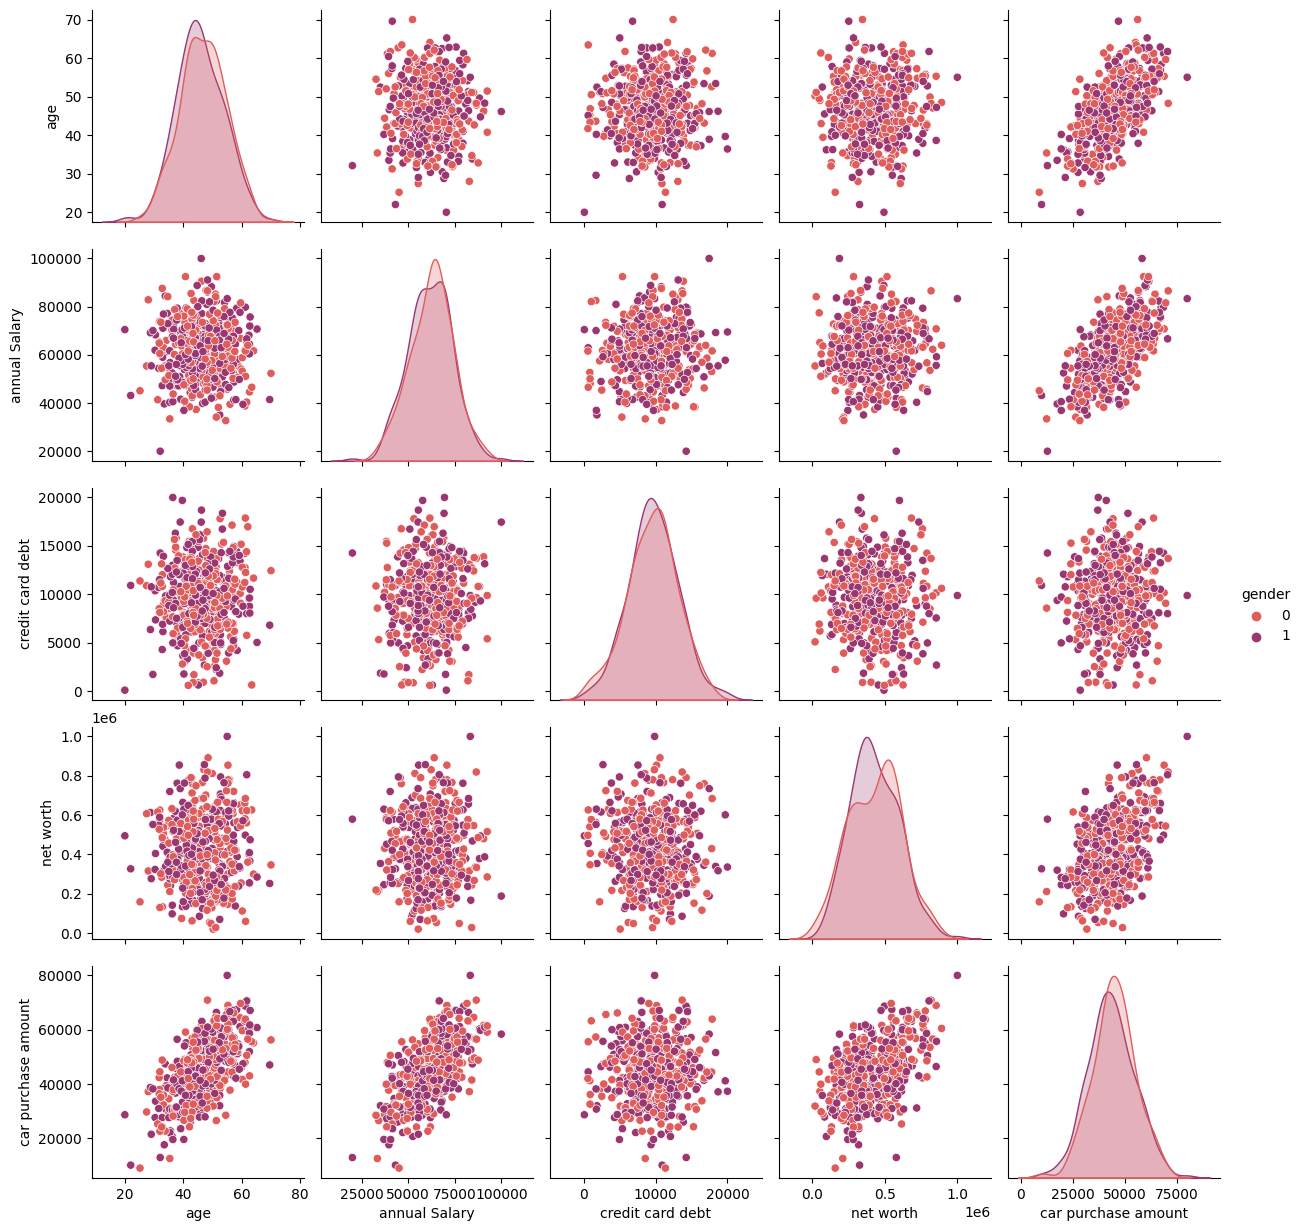

In [3]:
sns.pairplot(df,hue='gender',palette='flare')

### Task 4: Create a Plot to View Purchasing Amount and Net Worth

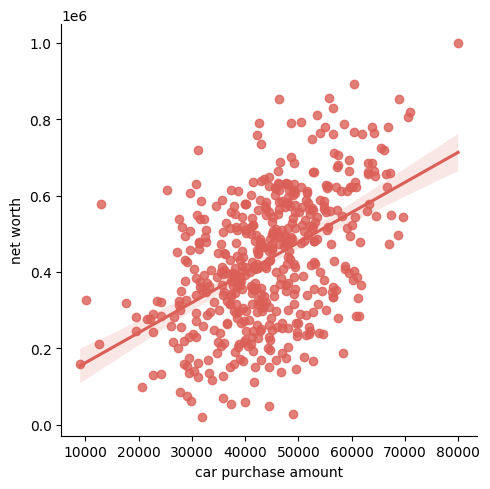

In [4]:
sns.set_palette('hls')

sns.lmplot(x='car purchase amount', y='net worth',data = df)

### Task 5: Create a Plot between Purchasing Amount and Age

Text(0.5, 1.0, 'purchase amount vs age hue gender')

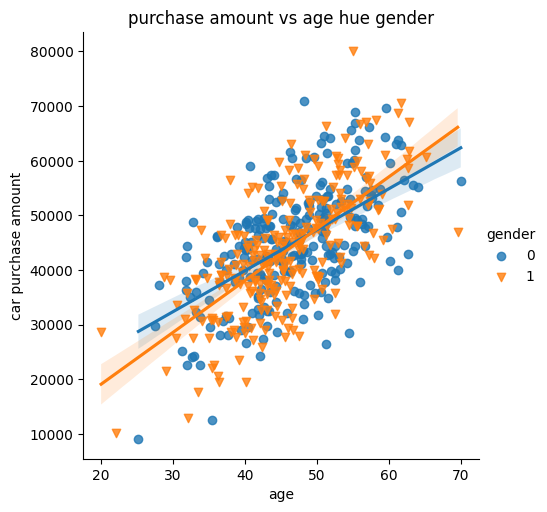

In [5]:
# Different markers for each gender and a specific color palette for clarity
sns.lmplot(x='age',y='car purchase amount',data=df,hue='gender',markers=['o','v'],palette='tab10')

#Title for the plot
plt.title('purchase amount vs age hue gender')

### Task 6: Create Plots for Comparative Analysis

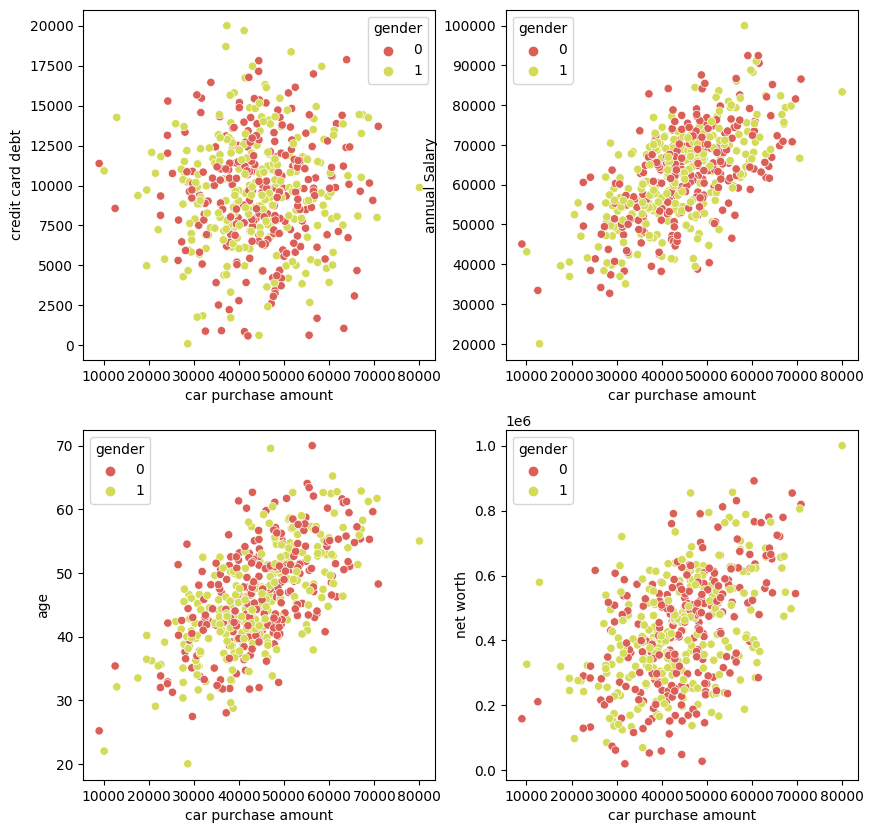

In [6]:
fig,axes = plt.subplots(2,2,figsize=(10,10))

cols = ['credit card debt','age','annual Salary','net worth']


for i in range(4):
    sns.scatterplot(
        x = 'car purchase amount',
        y=cols[i],
        data=df,
        ax = axes[i%2,i//2],
        hue = 'gender'
    )

### Task 7: Create Input and Output Parameters

In [7]:
df.drop(columns=['customer name','customer e-mail','country','gender'], inplace=True)

X = df.drop('car purchase amount',axis=1)
y = df['car purchase amount']

### Task 8: Split the Training and Testing Data

In [8]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

y = scaler.fit_transform(y.values.reshape(-1,1))

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Task 9: Build the Model

In [9]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=4))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


### Task 10: Train the Model

In [10]:
training = model.fit(X_train,y_train,epochs=50,validation_split=0.2,shuffle=True)

Epoch 1/50
10/10 [==============================] - 1s 43ms/step - loss: 0.3484 - mean_absolute_error: 0.5671 - val_loss: 0.3355 - val_mean_absolute_error: 0.5544
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 0.2870 - mean_absolute_error: 0.5131 - val_loss: 0.2796 - val_mean_absolute_error: 0.5031
Epoch 3/50
10/10 [==============================] - 0s 14ms/step - loss: 0.2389 - mean_absolute_error: 0.4649 - val_loss: 0.2339 - val_mean_absolute_error: 0.4565
Epoch 4/50
10/10 [==============================] - 0s 41ms/step - loss: 0.1969 - mean_absolute_error: 0.4186 - val_loss: 0.1922 - val_mean_absolute_error: 0.4095
Epoch 5/50
10/10 [==============================] - 0s 11ms/step - loss: 0.1573 - mean_absolute_error: 0.3710 - val_loss: 0.1523 - val_mean_absolute_error: 0.3589
Epoch 6/50
10/10 [==============================] - 0s 12ms/step - loss: 0.1188 - mean_absolute_error: 0.3174 - val_loss: 0.1136 - val_mean_absolute_error: 0.3025
Epoch 7/50
10/10 [====

### Task 11: Validate The Model

In [11]:
y_pred = model.predict(X_test)

accuracy = r2_score(y_test,y_pred)

print("Accuracy : ", accuracy * 100, "%")

4/4 [==============================] - 0s 2ms/step
Accuracy :  92.88016628307037 %
